# Algorithm Performance Data Analysis - Run 2

In [6]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data

## first test data 
data = pd.read_csv('IndividualCompressionData_since_test_20231031_150237.csv')

In [7]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231031_150237,10404007.png,502730,44612,458118,0.911261,30,20,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0001
1,2,test_20231031_150237,1254659.png,342646,104222,238424,0.695832,6,12,80080,14168,65912,0.823077,17.388292,2285.325643,14.541323,110,0.0001
2,3,test_20231031_150237,10188041.png,221231,13599,207632,0.938530,3,11,41731,1913,39818,0.954159,9.578884,813.111029,19.029305,110,0.0001
3,4,test_20231031_150237,10287332.png,216980,16302,200678,0.924869,3,7,22337,2218,20119,0.900703,8.782759,632.893397,20.117498,110,0.0001
4,5,test_20231031_150237,11610969.png,368720,42309,326411,0.885254,7,9,84111,6125,77986,0.927180,17.662498,2100.225157,14.908145,110,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,6,test_20231031_150557,10350842.png,212614,3269,209345,0.984625,2,5,42529,477,42052,0.988784,24.346599,3559.005141,12.617517,130,0.0009
1886,7,test_20231031_150557,10863862.png,317432,7077,310355,0.977705,2,6,66058,1039,65019,0.984271,36.419152,6690.678651,9.876102,130,0.0009
1887,8,test_20231031_150557,11382381.png,312486,567,311919,0.998186,2,5,46745,75,46670,0.998396,22.724233,2714.741744,13.793518,130,0.0009
1888,9,test_20231031_150557,11079715.png,443815,107637,336178,0.757473,5,7,124136,15102,109034,0.878343,17.963148,2364.288805,14.393798,130,0.0009


## Analyze per Image

In [8]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [9]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231031_150237,10404007.png,502730,44612,458118,0.911261,30,20,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0001
10,1,test_20231031_150239,10404007.png,502730,44612,458118,0.911261,4,6,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0002
20,1,test_20231031_150240,10404007.png,502730,44612,458118,0.911261,5,7,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0003
30,1,test_20231031_150241,10404007.png,502730,44612,458118,0.911261,4,6,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0004
40,1,test_20231031_150242,10404007.png,502730,44612,458118,0.911261,4,6,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,1,test_20231031_150553,10404007.png,502730,16122,486608,0.967931,3,6,61265,2344,58921,0.961740,26.208452,3568.336864,12.606145,130,0.0005
1850,1,test_20231031_150554,10404007.png,502730,16122,486608,0.967931,4,6,61265,2344,58921,0.961740,26.208452,3568.336864,12.606145,130,0.0006
1860,1,test_20231031_150555,10404007.png,502730,16122,486608,0.967931,4,5,61265,2344,58921,0.961740,26.208452,3568.336864,12.606145,130,0.0007
1870,1,test_20231031_150556,10404007.png,502730,16062,486668,0.968050,3,5,61265,2335,58930,0.961887,26.211972,3568.997280,12.605341,130,0.0008


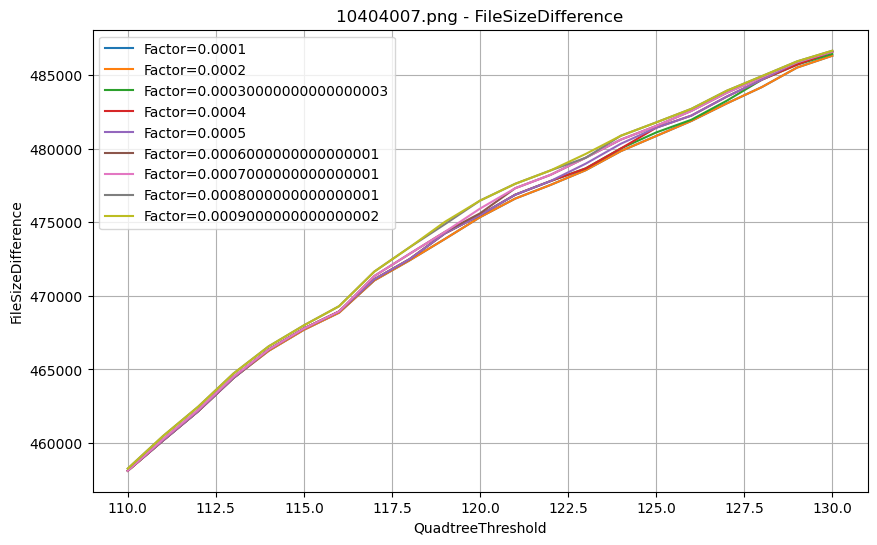

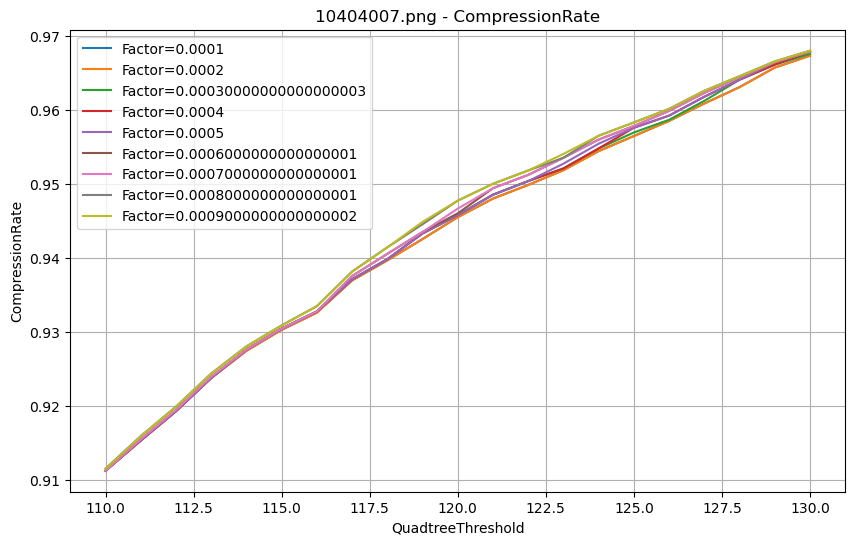

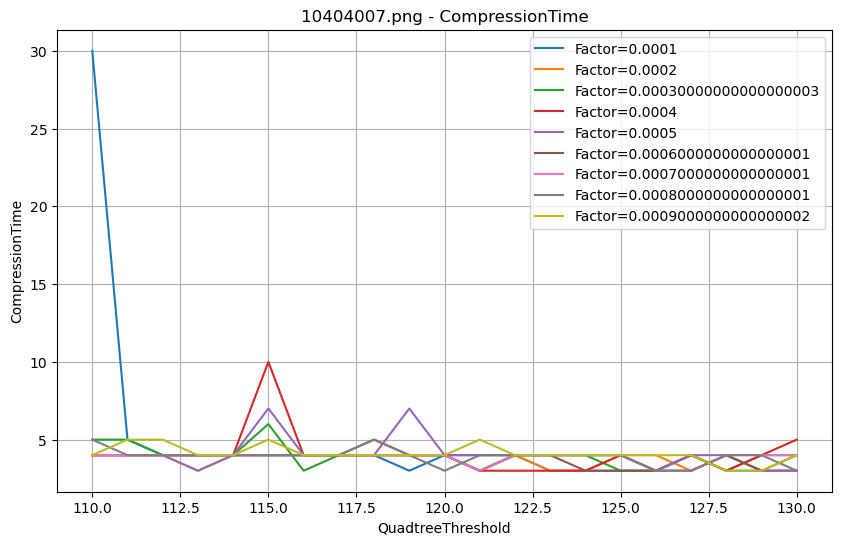

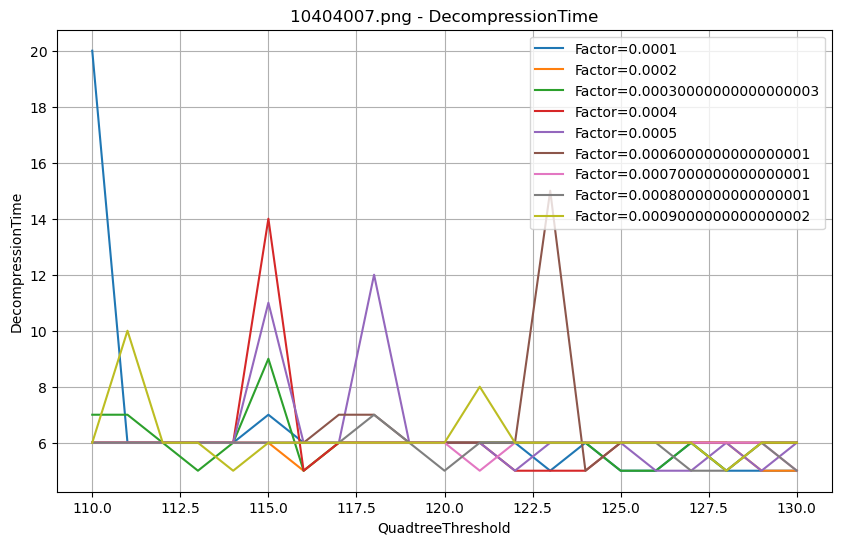

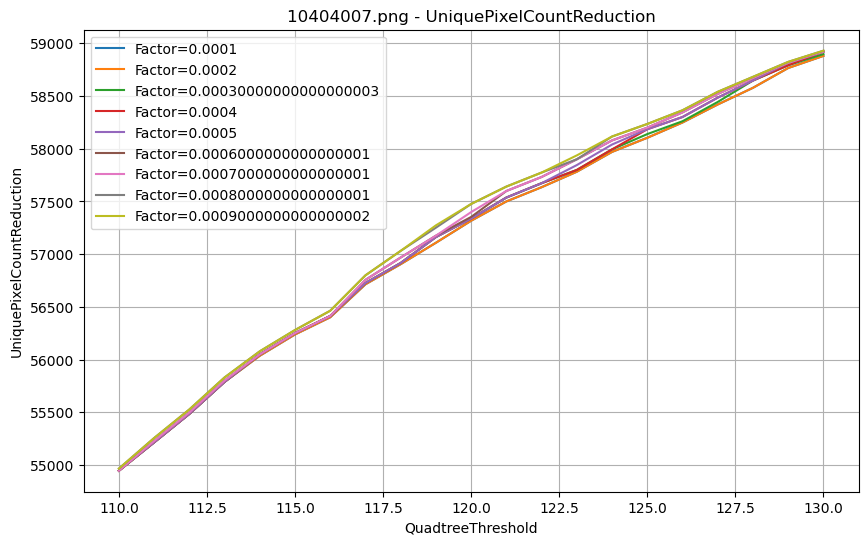

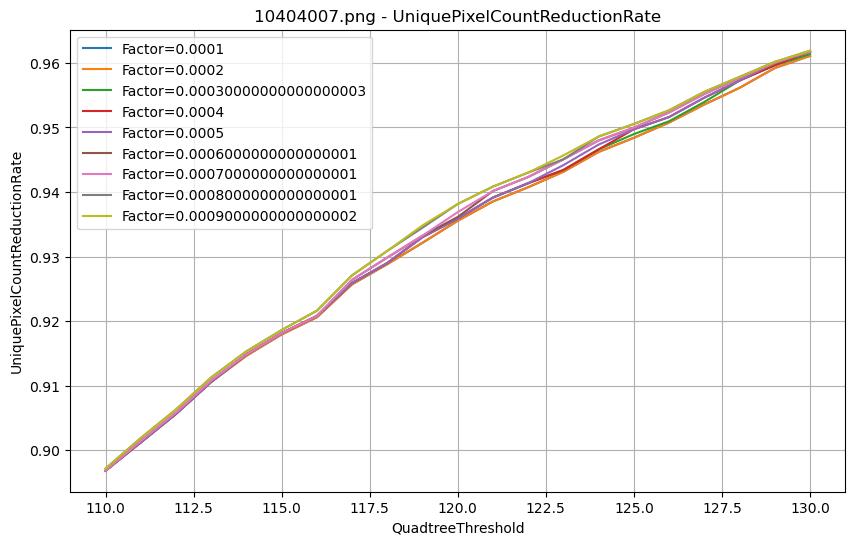

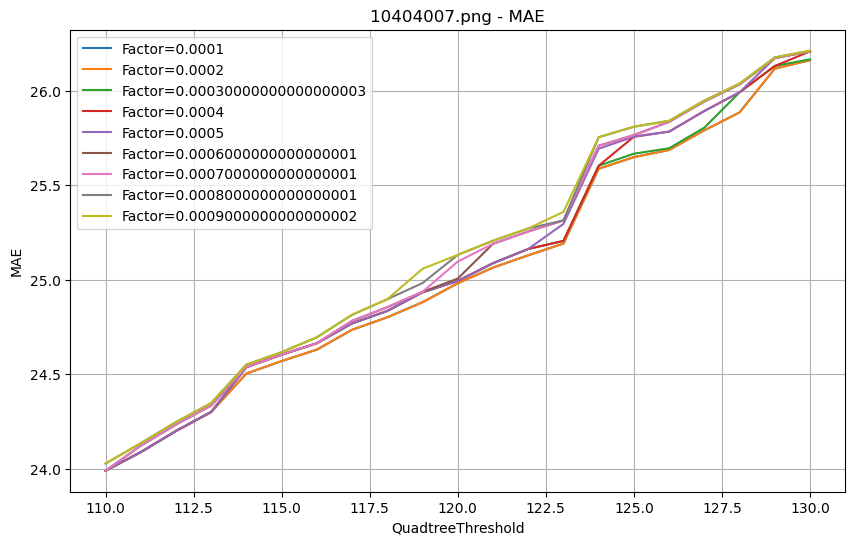

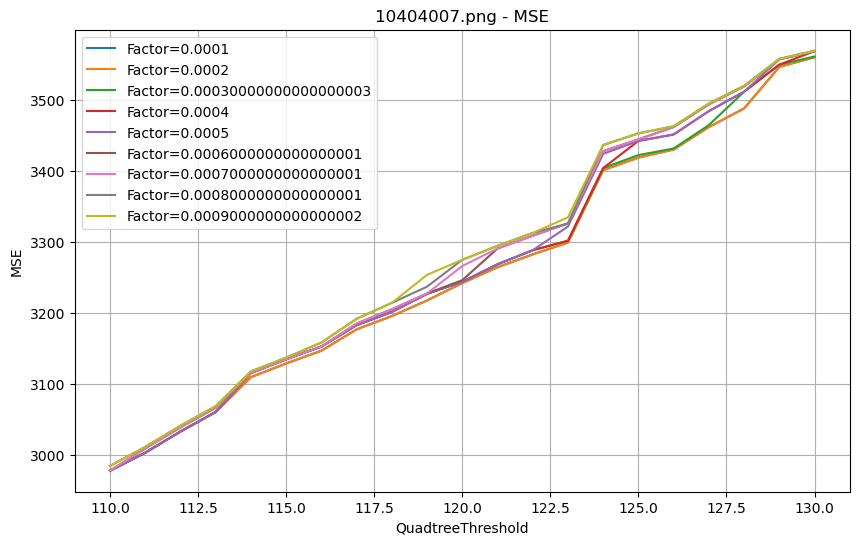

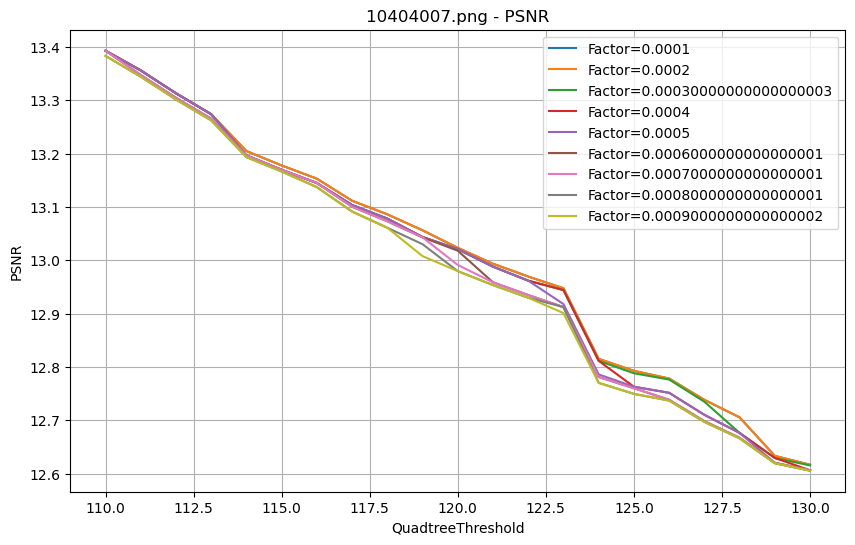

In [10]:
# List of metrics interested in
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Group by AllowedExceedingThresholdFactor and plot
    for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
        plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
    plt.title(f'{image_name} - {metric}')
    plt.xlabel('QuadtreeThreshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## Analyze per Test

In [11]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_6467/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [12]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231031_150237,110,0.0001,5.5,321053.7,41595.1,279458.6,0.886417,6.8,9.1,60908.4,5775.9,55132.5,0.922718,16.101271,1765.912919,16.059262
1,test_20231031_150239,110,0.0002,5.5,321053.7,41538.8,279514.9,0.886642,4.3,7.8,60908.4,5768.3,55140.1,0.922962,16.228578,1783.266368,16.003473
2,test_20231031_150240,110,0.0003,5.5,321053.7,41488.5,279565.2,0.886824,3.5,6.8,60908.4,5761.8,55146.6,0.923093,16.301170,1792.919392,15.970324
3,test_20231031_150241,110,0.0004,5.5,321053.7,41458.0,279595.7,0.886921,3.5,6.1,60908.4,5757.3,55151.1,0.923189,16.370267,1804.431757,15.943065
4,test_20231031_150242,110,0.0005,5.5,321053.7,41423.0,279630.7,0.887033,3.6,6.1,60908.4,5752.3,55156.1,0.923296,16.420173,1812.351420,15.925259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,test_20231031_150553,130,0.0005,5.5,321053.7,24288.6,296765.1,0.933918,3.2,6.2,60908.4,3436.3,57472.1,0.955546,20.648352,2847.655089,14.177976
185,test_20231031_150554,130,0.0006,5.5,321053.7,24230.4,296823.3,0.934120,3.5,6.0,60908.4,3428.0,57480.4,0.955687,20.754872,2866.005688,14.144696
186,test_20231031_150555,130,0.0007,5.5,321053.7,24222.4,296831.3,0.934156,3.3,5.6,60908.4,3427.0,57481.4,0.955711,20.758762,2866.414138,14.143400
187,test_20231031_150556,130,0.0008,5.5,321053.7,24087.7,296966.0,0.934727,2.9,5.7,60908.4,3407.4,57501.0,0.956132,21.185571,2966.017708,14.006008


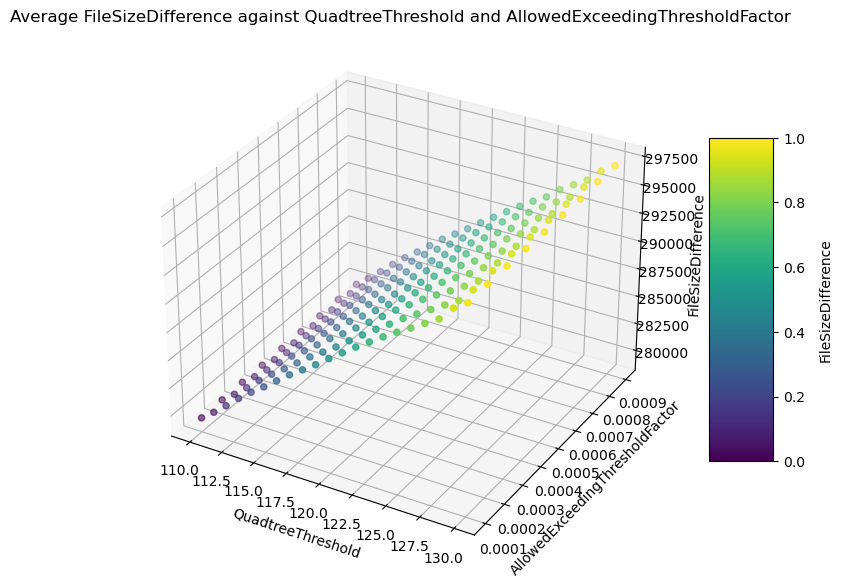

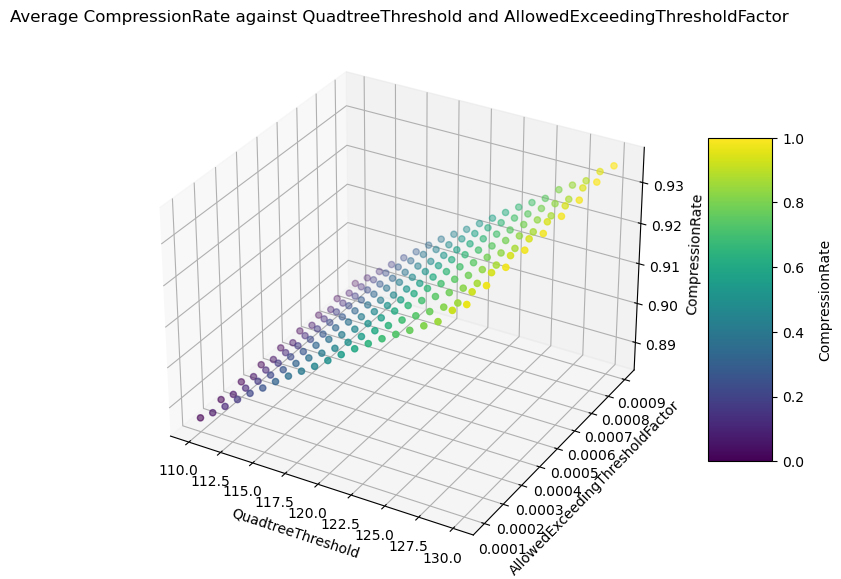

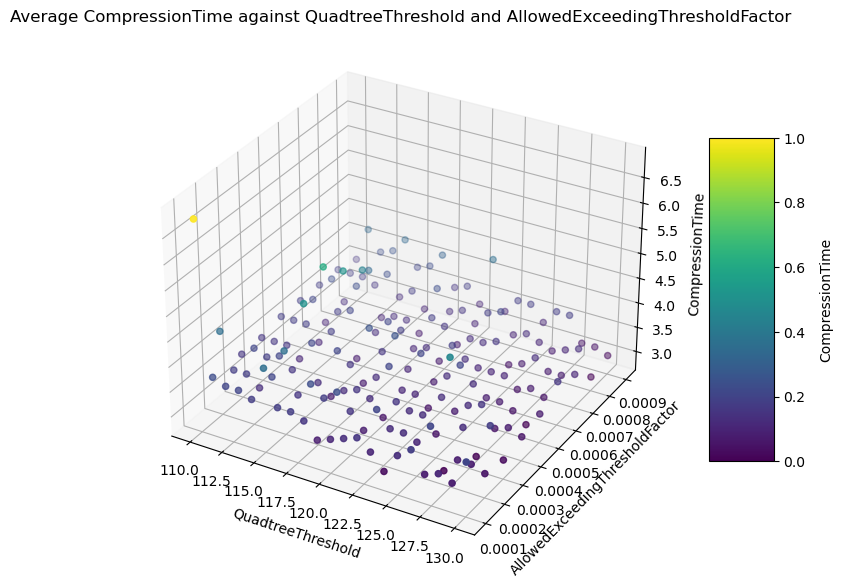

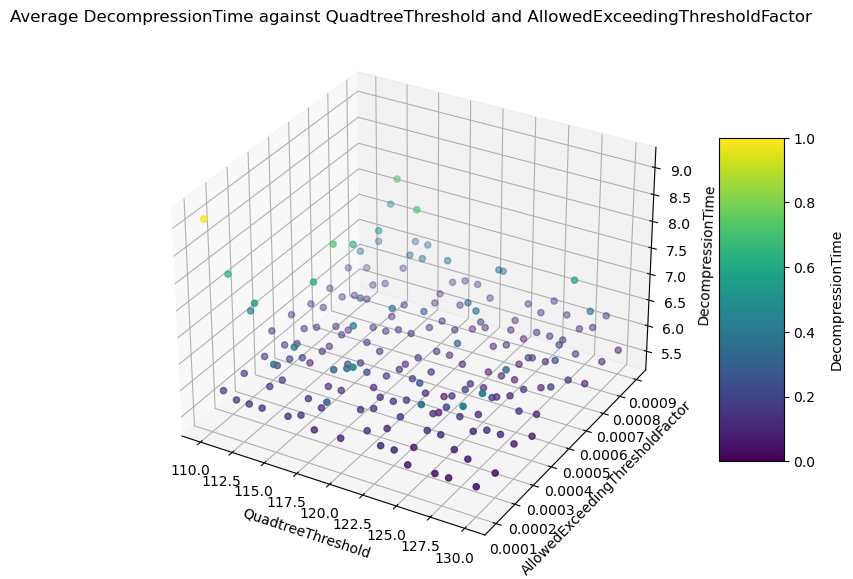

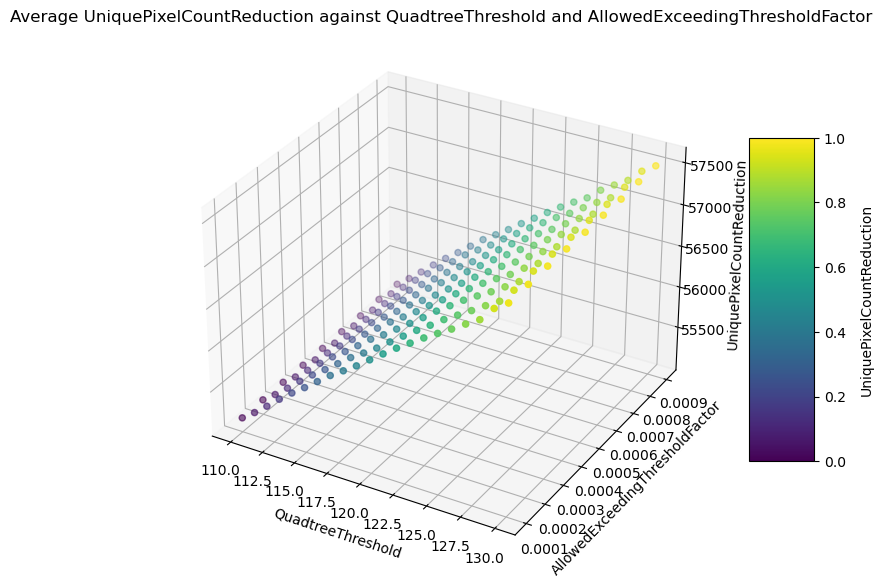

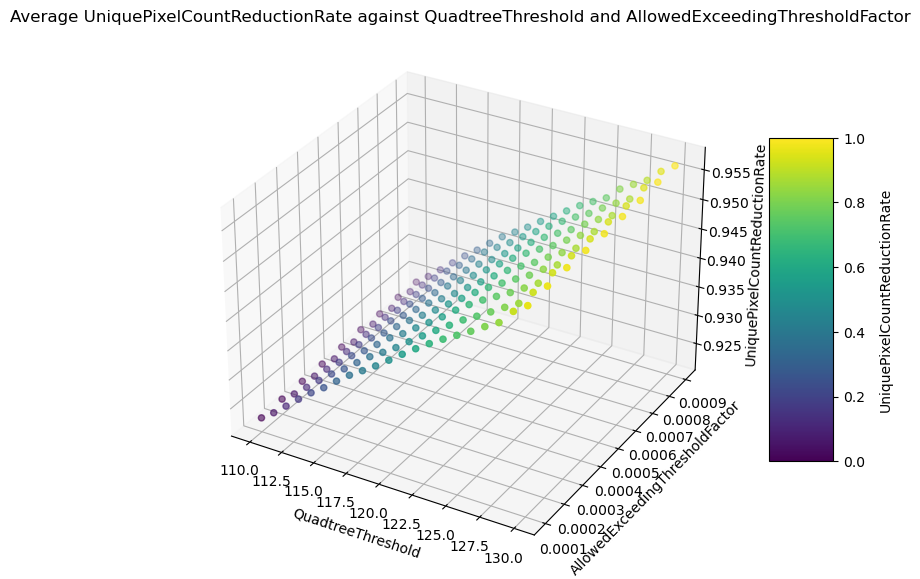

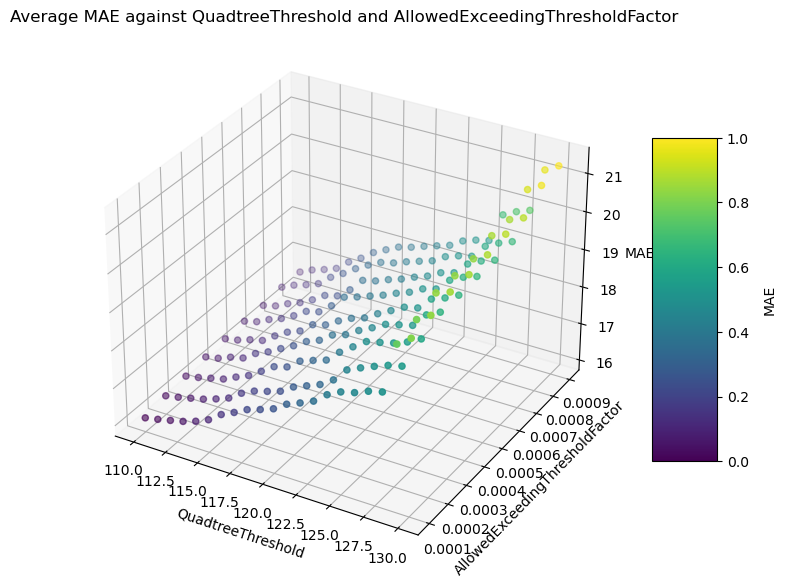

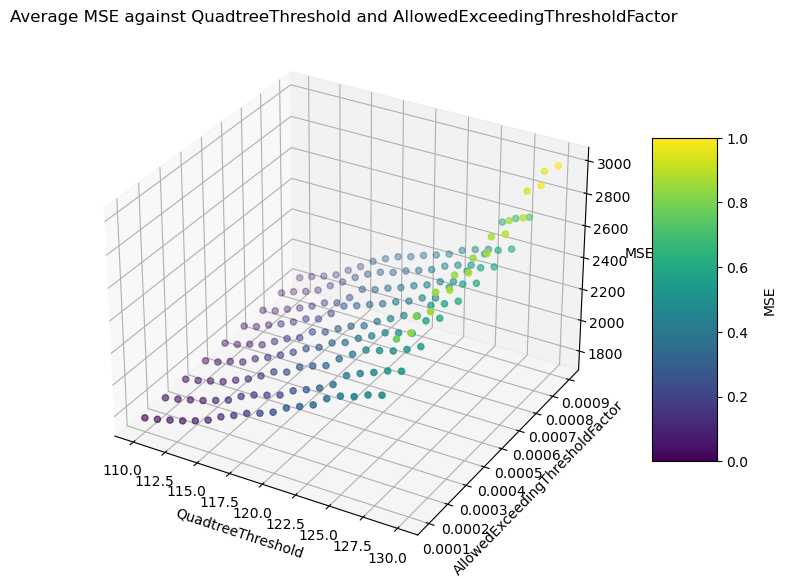

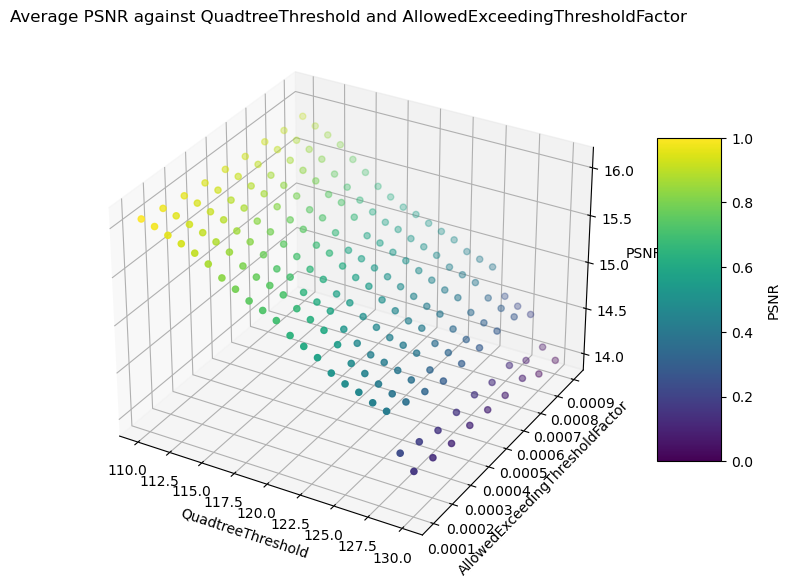

In [13]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


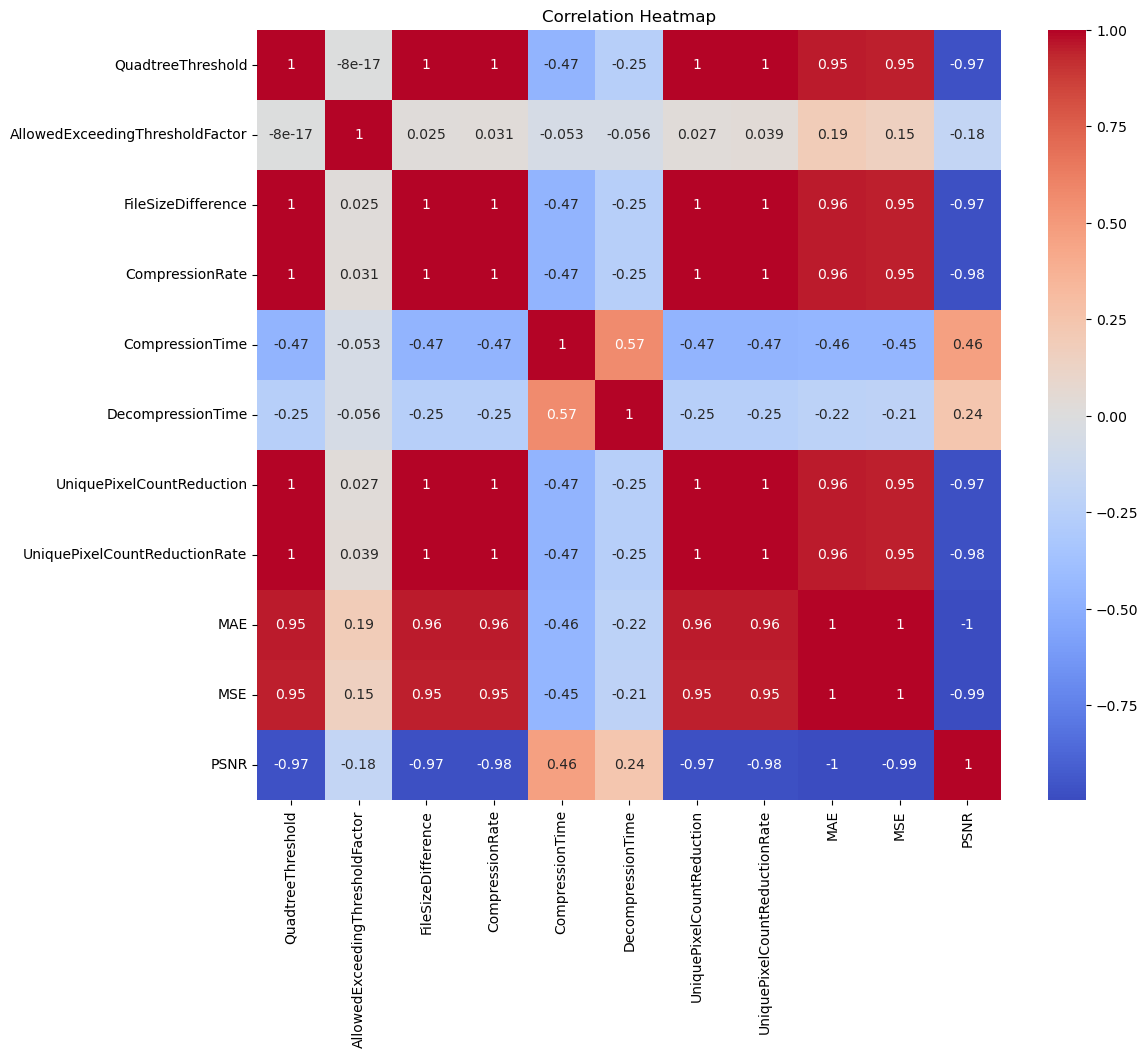

In [14]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [15]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

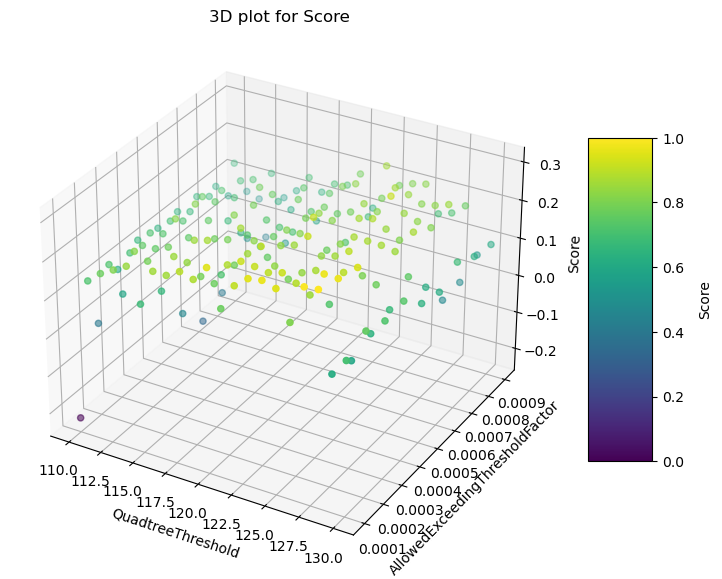

In [16]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

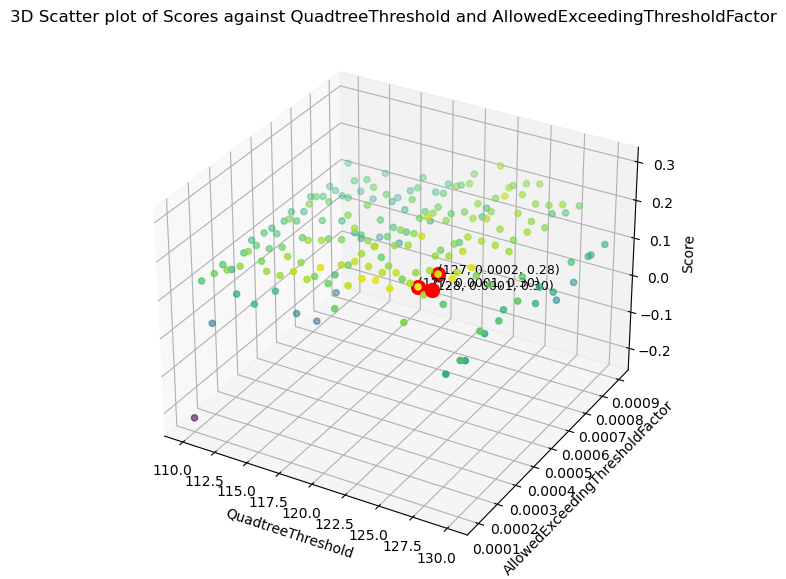

In [17]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [18]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


     QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
162                128                           0.0001  0.299702
153                127                           0.0001  0.296211
154                127                           0.0002  0.284792
